# Eaton and Palisade Fires Uninsured Population

**Author:** Megan Hessel 

**GitHub repo:** https://github.com/meganhessel/eds220-hwk4.git

### About 

**Purpose**

In this project, we will investigate the uninsured populations effected by the 2025 Eaton and Paslisade Fires using the Environmental Justice Index.

**Highlights**

1.  Manipulate raster data with `rasterio`.
2.  Manipulate and join vector data with `geopandas`.
3.  Clip geodataframes 
4.  Create professional and informative plots. 

**About the data**

-  Landsat 8 satellite recorded a collection of bands (red, green, blue, near-infrared and shortwave infrared) from the Landsat Collection 2 Level-2 atmospherically corrected surface reflectance data. Data was obtained from the [Microsoft Planetary Computer data catalogue](https://planetarycomputer.microsoft.com/dataset/landsat-c2-l2).

-  Geometries of the Eaton and Palisades fire perimeters from the [County of Los Angele's ArcGIS page](https://egis-lacounty.hub.arcgis.com/maps/ad51845ea5fb4eb483bc2a7c38b2370c/about).

-  California's Environmental Justice Index (EJI) is a collection of the demographics, environmental burdens, and health statistics for each census track in California. The EJI data is from the [Geospatial Research, Analysis, and Service Program (GRASP)](https://www.atsdr.cdc.gov/place-health/php/eji/eji-data-download.html). 

**Data References**

Centers for Disease Control and Prevention and Agency for Toxic Substances Disease Registry. (2024). *Environmental Justice Index*. Geospatial Research, Analysis, and Service Program (GRASP). Accessed Nov 28, 2025. https://atsdr.cdc.gov/place-health/php/eji/eji-data-download.html

County of Los Angeles. (January 21, 2025). *Palisades and Eaton Dissolved Fire Perimeters (2025)*. AcrGIS Online. https://egis-lacounty.hub.arcgis.com/maps/ad51845ea5fb4eb483bc2a7c38b2370c/about 

Microsoft. (2025). *Landsat Collection 2 Level-2* [Dataset]. Microsoft Planetary Computer. https://planetarycomputer.microsoft.com/dataset/landsat-c2-l2#overview



## 8. Uninsured Population Effected by the Eaton and Palisades Fires

To investigate the impact of the Eaton and Paslisades fire on unisured communities, we will use the California's Environmental Justice data's 'E_UNINSUR' variable. First, we must *clip* the EJI dataset to the fire perimeters. Then, assess the uninsured community by *plotting* the census tract data for each fire.

## Load Libraries 

In [18]:
# Helping import data easier
import os 

# Manipulating datasets 
import xarray as xr # Deals with rasters 
import geopandas as gpd # Deals with vector data 

# Making pretty maps 
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar
import matplotlib.patches as mpatches


## Load in Data 

Load in the data from 'EatonPalisadeFireScars' notebook and (additionally) the California EJScreen data. 

In [19]:
# Importing border data (from other notebook)

# Eaton Fire Perimeter  
fp_eaton = os.path.join('data', 'Eaton_Perimeter_20250121', 'Eaton_Perimeter_20250121.shp')
eaton = gpd.read_file(fp_eaton)

# Palisader Fire Perimeter  
fp_pal = fp = os.path.join('data', 'Palisades_Perimeter_20250121', 'Palisades_Perimeter_20250121.shp')
pal = gpd.read_file(fp_pal)

# Import the Landsat data
landsat = xr.open_dataset('data/landsat8-2025-02-23-palisades-eaton.nc')

In [20]:
# Importing Califorina Environmental Justice Index data (EJI)
cali = gpd.read_file(os.path.join('data', 'EJI_2024_California', 'EJI_2024_California.gdb'))

## Data Exploration of EJScreen data 

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 9109 entries, 0 to 9108
Columns: 174 entries, OBJECTID to geometry
dtypes: float64(147), geometry(1), int64(15), object(11)
memory usage: 12.1+ MB
None
The CRS for the Califoria's EJI data is PROJCS["USA_Contiguous_Albers_Equal_Area_Conic",GEOGCS["NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4269"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",37.5],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["ESRI","102003"]], and is the CRS projected? True


<Axes: >

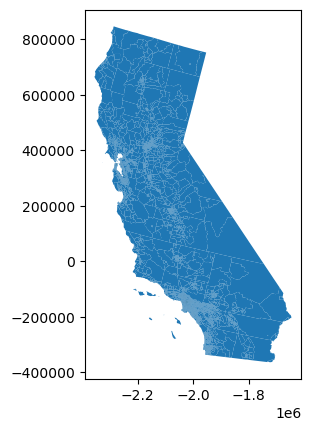

In [21]:
# EJI exploration 
# .info: Column names, NA counts, and types
print(cali.info()) 

# Print CRS 
print(f"The CRS for the Califoria's EJI data is {cali.crs}, and is the CRS projected? {cali.crs.is_projected}")

# Plotting
cali.plot()

### Brief Summary 

By looking at the data exploration, we can see that the EJScreen data has tons of information, including geometries of all California counties. The CRS does not match the others data's CRS. Therefore, we will have to transform the CRS. 

## Data Wrangling 

Recover Landsat's CRS with `.rio.write_crs()` 

In [22]:
# Recover the landsat CRS (discussed in 'EatonPalFireScars' notebook)
landsat_crs = landsat.spatial_ref.crs_wkt
landsat.rio.write_crs(landsat_crs, inplace = True) 

<xarray.Dataset> Size: 78MB
Dimensions:      (y: 1418, x: 2742)
Coordinates:
  * y            (y) float64 11kB 3.799e+06 3.799e+06 ... 3.757e+06 3.757e+06
  * x            (x) float64 22kB 3.344e+05 3.344e+05 ... 4.166e+05 4.166e+05
    time         datetime64[ns] 8B ...
    spatial_ref  int64 8B 0
Data variables:
    red          (y, x) float32 16MB ...
    green        (y, x) float32 16MB ...
    blue         (y, x) float32 16MB ...
    nir08        (y, x) float32 16MB ...
    swir22       (y, x) float32 16MB ...

Transform all CRSs to match the landsat data

In [23]:
# Transform EJI and fire borders crs to match landsat's crs (discussed in 'EatonPalFireScars' notebook)
eaton.to_crs(landsat.rio.crs, inplace = True)
pal.to_crs(landsat.rio.crs, inplace = True)
cali.to_crs(landsat.rio.crs, inplace = True)

In [24]:
# Final Check - make sure all CRS match 
print(f"Does the Eaton and Palisades borders CRSs match? {eaton.crs == pal.crs}")
print(f"Does the Eaton border and Landsat raster CRSs match? {eaton.crs == landsat.rio.crs}")
print(f"Does the Cali EJI and the Eaton border CRSs match? {eaton.crs == cali.crs}")
print(f"Does the Cali EJI and the Landsat raster CRSs match? {landsat.rio.crs == cali.crs}")

Does the Eaton and Palisades borders CRSs match? True
Does the Eaton border and Landsat raster CRSs match? True
Does the Cali EJI and the Eaton border CRSs match? True
Does the Cali EJI and the Landsat raster CRSs match? True


## Clip EJScreen data with the fire's borders 

Using `geopandas.clip()`, clip the cali df to the fires' perimeters.

In [25]:
# CLIP EJI census tracks with border data 
eaton_join = gpd.clip(cali, eaton)
pal_join = gpd.clip(cali, pal)

## Figure of Fire's Uninsured population 

Create a figure showing the difference between uninsured populations impacted by the fires. 

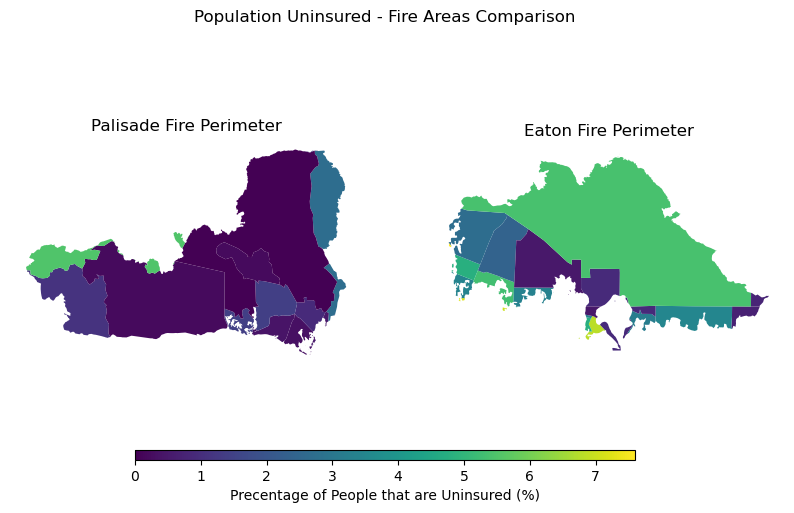

In [26]:
# Create empty figure 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Picking out the population uninsured measurement within the EJI dataframe 
eji_variable = 'E_UNINSUR'

# Find common min/max for legend range
vmin = min(pal_join[eji_variable].min(), eaton_join[eji_variable].min())
vmax = max(pal_join[eji_variable].max(), eaton_join[eji_variable].max())

# Plot census tracts within Palisades perimeter
pal_join.plot(
    column= eji_variable,
    vmin=vmin, vmax=vmax,
    legend=False,
    ax=ax1,
)
ax1.set_title('Palisade Fire Perimeter')
ax1.axis('off')

# Plot census tracts within Eaton perimeter
eaton_join.plot(
    column=eji_variable,
    vmin=vmin, vmax=vmax,
    legend=False,
    ax=ax2,
)
ax2.set_title('Eaton Fire Perimeter')
ax2.axis('off')

# Add overall title
fig.suptitle('Population Uninsured - Fire Areas Comparison')

# Add shared colorbar at the bottom
sm = plt.cm.ScalarMappable( norm=plt.Normalize(vmin=vmin, vmax=vmax))
cbar_ax = fig.add_axes([0.25, 0.08, 0.5, 0.02])  # [left, bottom, width, height]
cbar = fig.colorbar(sm, cax=cbar_ax, orientation='horizontal')
cbar.set_label('Precentage of People that are Uninsured (%)')

plt.show()

## Brief Explaination 

The main area impacted by the Palastine Fire was the Pacific Palastines, a region widely recognized for its affluence and wealth. In contrast, the Eaton fire devestated the Altadena neighborhood, a community with a historically Black population (Ong et al., n.d.). However, as home prices and financal and environmenal burdens increase for this community, there is a decline in new, young Black homeowners (Ong et al., n.d.). 

The figure above illustrates the differences between the communities impacted by the fires. While both areas exhibit relatively low percentages of uninsured residents, the Eaton fire (located further from the waters edge) shows a higher concentraion of communities dealing with the catastrophy without insurance coverage. 